https://www.worldfootball.net/report/premier-league-2015-2016-manchester-united-tottenham-hotspur/

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import itertools
import lxml
import requests
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [2]:
number_players = 11

In [3]:
source_team = requests.get('https://www.worldfootball.net/players/eng-premier-league-2015-2016/').text

In [4]:
soup_team = BeautifulSoup(source_team,'lxml')

In [5]:
table_teams = soup_team.find_all(class_='standard_tabelle')[0]

In [6]:
fixtures_columns = ['home_team','away_team']
for which_team in ['home', 'away']:
    for i in range(1,number_players+1):
        fixtures_columns.append(which_team +(str(i)))
fixtures_columns.append('home_score')
fixtures_columns.append('away_score')

In [7]:
fixtures = pd.DataFrame(columns=fixtures_columns)

In [8]:
fixtures

,home_team,away_team,home1,home2,home3,home4,home5,home6,home7,home8,...,away4,away5,away6,away7,away8,away9,away10,away11,home_score,away_score


In [9]:
players_columns = ['name','team','season']

In [10]:
players_df = pd.DataFrame(columns=players_columns)

In [11]:
teams_list = []
for i in table_teams.contents:
    if len(i) > 1:
        teams_list.append(i.contents[1].contents[1]['href'].split('teams/')[1].split('/')[0])

In [12]:
teams_list

['afc-bournemouth',
 'arsenal-fc',
 'aston-villa',
 'chelsea-fc',
 'crystal-palace',
 'everton-fc',
 'leicester-city',
 'liverpool-fc',
 'manchester-city',
 'manchester-united',
 'newcastle-united',
 'norwich-city',
 'southampton-fc',
 'stoke-city',
 'sunderland-afc',
 'swansea-city',
 'tottenham-hotspur',
 'watford-fc',
 'west-bromwich-albion',
 'west-ham-united']

In [13]:
every_fixture = []

for team_1 in teams_list:
    for team_2 in teams_list:
        if team_1 != team_2:
            every_fixture.append([team_1,team_2])

In [24]:
def sarting_lineup(table_players,players_list):
    counter = 0
    for i in table_players.contents:
        if (len(i) > 4) & (counter <number_players):
            players_list.append(i.contents[3].contents[1]['title'])
            counter +=1
    
def scrape_match(season,team_home,team_away, debug=False):
    html = 'https://www.worldfootball.net/report/premier-league-' + season + '-' + team_home + '-' +team_away
    if debug:
        print(html)
    if html == "https://www.worldfootball.net/report/premier-league-2017-2018-southampton-fc-west-ham-united":
        html = html + "_2"
    source = requests.get(html).text
    soup = BeautifulSoup(source,'lxml')
    score = soup.find_all(class_='standard_tabelle')[0]
    table_players_home = soup.find_all(class_='standard_tabelle')[2]
    if len(table_players_home.contents) > 10:
        table_players_away = soup.find_all(class_='standard_tabelle')[3]
    else:
        table_players_home = soup.find_all(class_='standard_tabelle')[3]
        table_players_away = soup.find_all(class_='standard_tabelle')[4]
    players_list = []
    sarting_lineup(table_players_home,players_list)
    sarting_lineup(table_players_away,players_list)
    text=score.contents[3].contents[3].contents[1].text
    score_arr = []
    for c in text: 
        if c.isdigit():
            score_arr.append(int(c))
    return players_list,score_arr

In [15]:
players_list,score_arr = scrape_match('2015-2016',every_fixture[20][0],every_fixture[20][1], debug=True)

https://www.worldfootball.net/report/premier-league-2015-2016-arsenal-fc-aston-villa


In [16]:
players_list

[u'Petr \xc4\x8cech',
 ' Gabriel Paulista',
 'Laurent Koscielny',
 ' Nacho Monreal',
 u' H\xc3\xa9ctor Beller\xc3\xadn',
 'Jack Wilshere',
 u'Mesut \xc3\x96zil',
 ' Santi Cazorla',
 'Francis Coquelin',
 'Olivier Giroud',
 u'Alexis S\xc3\xa1nchez',
 'Mark Bunn',
 'Leandro Bacuna',
 'Joleon Lescott',
 'Aly Cissokho',
 'Kevin Toner',
 'Idrissa Gueye',
 'Scott Sinclair',
 'Ashley Westwood',
 u'Carlos S\xc3\xa1nchez',
 'Jordan Lyden',
 'Jordan Ayew']

In [17]:
score_arr

[4, 0]

In [18]:
fixtures.append(pd.Series(every_fixture[20] +players_list +score_arr,index=fixtures.columns),ignore_index=True)

,home_team,away_team,home1,home2,home3,home4,home5,home6,home7,home8,...,away4,away5,away6,away7,away8,away9,away10,away11,home_score,away_score
0,arsenal-fc,aston-villa,Petr Äech,Gabriel Paulista,Laurent Koscielny,Nacho Monreal,HÃ©ctor BellerÃ­n,Jack Wilshere,Mesut Ãzil,Santi Cazorla,...,Aly Cissokho,Kevin Toner,Idrissa Gueye,Scott Sinclair,Ashley Westwood,Carlos SÃ¡nchez,Jordan Lyden,Jordan Ayew,4.0,0.0


In [19]:
players_df = pd.DataFrame(columns=players_columns)

In [20]:
players_df_current = pd.DataFrame(columns=players_columns)
players_df_current['name'] = players_list
players_df_current['team'] = [every_fixture[20][0]]*number_players+[every_fixture[20][1]]*number_players
players_df_current['season'] = "2016"

In [21]:
players_df_current

,name,team,season
0,Petr Äech,arsenal-fc,2016
1,Gabriel Paulista,arsenal-fc,2016
2,Laurent Koscielny,arsenal-fc,2016
3,Nacho Monreal,arsenal-fc,2016
4,HÃ©ctor BellerÃ­n,arsenal-fc,2016
5,Jack Wilshere,arsenal-fc,2016
6,Mesut Ãzil,arsenal-fc,2016
7,Santi Cazorla,arsenal-fc,2016
8,Francis Coquelin,arsenal-fc,2016
9,Olivier Giroud,arsenal-fc,2016


In [22]:
def scrape_season(season, debug=False):
    seaon_source = str(season - 1) + '-' + str(season)
    source_team = requests.get('https://www.worldfootball.net/players/eng-premier-league-'+seaon_source +'/').text
    soup_team = BeautifulSoup(source_team,'lxml')
    table_teams = soup_team.find_all(class_='standard_tabelle')[0]
    teams_list = []
    for i in table_teams.contents:
        if len(i) > 1:
            teams_list.append(i.contents[1].contents[1]['href'].split('teams/')[1].split('/')[0])
    fixtures_columns = ['home_team','away_team']
    for which_team in ['home', 'away']:
        for i in range(1,number_players+1):
            fixtures_columns.append(which_team +(str(i)))
    fixtures_columns.append('home_score')
    fixtures_columns.append('away_score')
    fixtures = pd.DataFrame(columns=fixtures_columns)
    players_columns = ['name','team']
    players_df = pd.DataFrame(columns=players_columns)
    every_fixture = []
    for team_1 in teams_list:
        for team_2 in teams_list:
            if team_1 != team_2:
                every_fixture.append([team_1,team_2])
    for fixture in every_fixture:
        players_list,score_arr = scrape_match(seaon_source,fixture[0],fixture[1],debug)
        fixtures = fixtures.append(pd.Series(fixture +players_list +score_arr,index=fixtures.columns),ignore_index=True)
        players_df_current = pd.DataFrame(columns=players_columns)
        players_df_current['name'] = players_list
        players_df_current['team'] = [fixture[0]]*number_players+[fixture[1]]*number_players
        players_df = pd.concat([players_df,players_df_current])
    
    fixtures['season'] = str(season)
    players_df['season'] = str(season)
    players_df['count']=1
    return fixtures,players_df

In [39]:
fixtures_2018,players_df_2018 = scrape_season(2018,debug=True)

https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-arsenal-fc
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-brighton-hove-albion
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-burnley-fc
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-chelsea-fc
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-crystal-palace
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-everton-fc
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-huddersfield-town
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-leicester-city
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-liverpool-fc
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-manchester-city
https://www.worldfootball.net/report/premier-league-2017-2018-afc-bournemouth-

In [40]:
fixtures_2018

,home_team,away_team,home1,home2,home3,home4,home5,home6,home7,home8,...,away5,away6,away7,away8,away9,away10,away11,home_score,away_score,season
0,afc-bournemouth,arsenal-fc,Asmir BegoviÄ,Simon Francis,Steve Cook,Nathan AkÃ©,Charlie Daniels,Adam Smith,Dan Gosling,Lewis Cook,...,HÃ©ctor BellerÃ­n,Jack Wilshere,Granit Xhaka,Ainsley Maitland-Niles,Alexandre Lacazette,Alex Iwobi,Danny Welbeck,2.0,1.0,2018
1,afc-bournemouth,brighton-hove-albion,Asmir BegoviÄ,Simon Francis,Nathan AkÃ©,Charlie Daniels,Adam Smith,Andrew Surman,Marc Pugh,Harry Arter,...,Markus Suttner,Dale Stephens,Anthony Knockaert,Pascal GroÃ,Solomon March,Davy PrÃ¶pper,Tomer Hemed,2.0,1.0,2018
2,afc-bournemouth,burnley-fc,Asmir BegoviÄ,Simon Francis,Steve Cook,Nathan AkÃ©,Charlie Daniels,Andrew Surman,Marc Pugh,Harry Arter,...,Phil Bardsley,Jack Cork,Robbie Brady,Jeff Hendrick,Steven Defour,JÃ³hann GuÃ°mundsson,Chris Wood,1.0,2.0,2018
3,afc-bournemouth,chelsea-fc,Asmir BegoviÄ,Simon Francis,Steve Cook,Nathan AkÃ©,Charlie Daniels,Adam Smith,Andrew Surman,Lewis Cook,...,Azpilicueta,David Luiz,Cesc FÃ bregas,TiemouÃ© Bakayoko,Morata,Eden Hazard,Pedro,0.0,1.0,2018
4,afc-bournemouth,crystal-palace,Asmir BegoviÄ,Simon Francis,Steve Cook,Nathan AkÃ©,Charlie Daniels,Dan Gosling,Marc Pugh,Lewis Cook,...,Aaron Wan-Bissaka,Luka MilivojeviÄ,Yohan Cabaye,Ruben Loftus-Cheek,Andros Townsend,James McArthur,Wilfried Zaha,2.0,2.0,2018
5,afc-bournemouth,everton-fc,Asmir BegoviÄ,Simon Francis,Steve Cook,Nathan AkÃ©,Adam Smith,Dan Gosling,Lewis Cook,Ryan Fraser,...,Jonjoe Kenny,Morgan Schneiderlin,Aaron Lennon,James McCarthy,Idrissa Gueye,Gylfi SigurÃ°sson,Dominic Calvert-Lewin,2.0,1.0,2018
6,afc-bournemouth,huddersfield-town,Asmir BegoviÄ,Simon Francis,Steve Cook,Nathan AkÃ©,Charlie Daniels,Andrew Surman,Marc Pugh,Harry Arter,...,Florent Hadergjonaj,Aaron Mooy,Rajiv van La Parra,Daniel Williams,Tom Ince,Elias Kachunga,Laurent Depoitre,4.0,0.0,2018
7,afc-bournemouth,leicester-city,Asmir BegoviÄ,Simon Francis,Nathan AkÃ©,Charlie Daniels,Adam Smith,Andrew Surman,Marc Pugh,Lewis Cook,...,Christian Fuchs,Andy King,Marc Albrighton,Wilfred Ndidi,Demarai Gray,Jamie Vardy,Shinji Okazaki,0.0,0.0,2018
8,afc-bournemouth,liverpool-fc,Asmir BegoviÄ,Simon Francis,Nathan AkÃ©,Charlie Daniels,Adam Smith,Andrew Surman,Marc Pugh,Lewis Cook,...,Andrew Robertson,Georginio Wijnaldum,Coutinho,Jordan Henderson,Alex Oxlade-Chamberlain,Roberto Firmino,Mohamed Salah,0.0,4.0,2018
9,afc-bournemouth,manchester-city,Asmir BegoviÄ,Steve Cook,Nathan AkÃ©,Charlie Daniels,Adam Smith,Tyrone Mings,Dan Gosling,Andrew Surman,...,NicolÃ¡s Otamendi,Kevin De Bruyne,David Silva,Fernandinho,Raheem Sterling,Bernardo Silva,Gabriel Jesus,1.0,2.0,2018


In [41]:
players_df_2018

,name,team,season,count
0,Asmir BegoviÄ,afc-bournemouth,2018,1
1,Simon Francis,afc-bournemouth,2018,1
2,Steve Cook,afc-bournemouth,2018,1
3,Nathan AkÃ©,afc-bournemouth,2018,1
4,Charlie Daniels,afc-bournemouth,2018,1
5,Adam Smith,afc-bournemouth,2018,1
6,Dan Gosling,afc-bournemouth,2018,1
7,Lewis Cook,afc-bournemouth,2018,1
8,Ryan Fraser,afc-bournemouth,2018,1
9,Callum Wilson,afc-bournemouth,2018,1


In [42]:
players_df_2018_groupby = players_df_2018.groupby(['name','team','season']).count().reset_index()

In [43]:
np.mean(players_df_2018_groupby['count']),np.median(players_df_2018_groupby['count']),np.std(players_df_2018_groupby['count'])

(17.096114519427402, 17.0, 11.300368509978899)

In [44]:
players_df_2018_groupby.sort(['team','name'])

C:\Users\omri\Anaconda2.7\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,team,season,count
58,Adam Smith,afc-bournemouth,2018,22
78,Andrew Surman,afc-bournemouth,2018,20
96,Asmir BegoviÄ,afc-bournemouth,2018,38
106,Benik Afobe,afc-bournemouth,2018,5
111,Callum Wilson,afc-bournemouth,2018,23
117,Charlie Daniels,afc-bournemouth,2018,34
143,Dan Gosling,afc-bournemouth,2018,21
175,Emerson Hyndman,afc-bournemouth,2018,1
204,Harry Arter,afc-bournemouth,2018,11
221,Jack Simpson,afc-bournemouth,2018,1


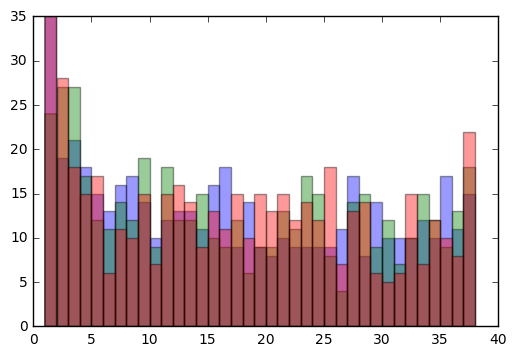

In [45]:
ax = plt.subplot()
_=ax.hist(players_df_2017_groupby['count'],np.arange(1,39),alpha=.4)
_=ax.hist(players_df_2016_groupby['count'],np.arange(1,39),alpha=.4)
_=ax.hist(players_df_2018_groupby['count'],np.arange(1,39),alpha=.4)

In [46]:
players_df_2018_groupby[players_df_2018_groupby.duplicated(['name'],keep=False)]

,name,team,season,count
50,Aaron Lennon,burnley-fc,2018,13
51,Aaron Lennon,everton-fc,2018,9
66,Alex Oxlade-Chamberlain,arsenal-fc,2018,3
67,Alex Oxlade-Chamberlain,liverpool-fc,2018,14
71,Alexis SÃ¡nchez,arsenal-fc,2018,17
72,Alexis SÃ¡nchez,manchester-united,2018,12
80,AndrÃ© Ayew,swansea-city,2018,10
81,AndrÃ© Ayew,west-ham-united,2018,9
84,Andy King,leicester-city,2018,5
85,Andy King,swansea-city,2018,9


In [47]:
fixtures_2018_enc = fixtures_2018.copy()
for col in fixtures_2018_enc.columns[2:-3]:
    fixtures_2018_enc[col] = fixtures_2018_enc[col].str.encode('utf-8')

In [48]:
fixtures_2018_enc.to_csv('fixtures_2018.csv',index=False)
players_df_2016.to_csv('players_df_2018.csv',index=False)

In [49]:
fixtures_2016 = pd.read_csv('fixtures_2016.csv')
players_df_2016= pd.read_csv('players_df_2016.csv')
fixtures_2017 = pd.read_csv('fixtures_2017.csv')
players_df_2017= pd.read_csv('players_df_2017.csv')
fixtures_2018 = pd.read_csv('fixtures_2018.csv')
players_df_2018= pd.read_csv('players_df_2018.csv')

In [50]:
players_df_2016_groupby = players_df_2016.groupby(['name','team','season']).count().reset_index()
players_df_2017_groupby = players_df_2017.groupby(['name','team','season']).count().reset_index()
players_df_2018_groupby = players_df_2018.groupby(['name','team','season']).count().reset_index()

In [51]:
train_players = pd.concat([players_df_2016_groupby,players_df_2017_groupby])

In [52]:
two_season = train_players.groupby(["name","team"]).sum().reset_index()

In [53]:
two_season.head()

,name,team,season,count
0,AdriÃ¡n,west-ham-united,4033,48
1,Alberto Moreno,liverpool-fc,4033,30
2,Aleix GarcÃ­a,manchester-city,2017,1
3,Alexandre Pato,chelsea-fc,2016,1
4,Ander Herrera,manchester-united,4033,44


In [83]:
players_df_2016_groupby["name"] = players_df_2016_groupby["name"].str.encode('utf-8')
players_df_2017_groupby["name"] = players_df_2017_groupby["name"].str.encode('utf-8')

In [54]:
two_season[two_season.duplicated(['name'],keep=False)]

,name,team,season,count
36,JosÃ© Fonte,southampton-fc,4033,54
37,JosÃ© Fonte,west-ham-united,2017,16
82,Adnan Januzaj,manchester-united,2016,2
83,Adnan Januzaj,sunderland-afc,2017,18
84,Adrian Mariappa,crystal-palace,2016,3
85,Adrian Mariappa,watford-fc,2017,6
101,Allan Nyom,watford-fc,2016,29
102,Allan Nyom,west-bromwich-albion,2017,29
110,Andros Townsend,crystal-palace,2017,30
111,Andros Townsend,newcastle-united,2016,12


In [94]:
np.mean(two_season['count']),np.median(two_season['count']),np.std(two_season['count'])

(23.48314606741573, 18.0, 19.98875378163203)

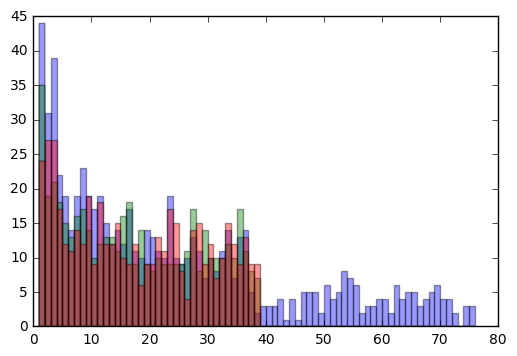

In [55]:
ax = plt.subplot()
_=ax.hist(two_season['count'],np.arange(1,77),alpha=.4)
_=ax.hist(players_df_2017_groupby['count'],np.arange(1,77),alpha=.4)
_=ax.hist(players_df_2016_groupby['count'],np.arange(1,77),alpha=.4)